In [4]:
!pip install pybamm
import pybamm
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 45.4 MB/s eta 0:00:00


In [1]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (51) :
        experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        ("discharge at 0.8A until 2.48V",  # discharging by default
         "rest for 15 minute",
         f"charge at 12A until 4.2V",
         "hold at 4.2V until C/50",
         "rest for 15 minute")])
        sim2 = pybamm.Simulation(spm, experiment=experiment2, parameter_values=params)
        sol2 = sim2.solve(starting_solution=solution[i])
        solution.append(sol2)
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    for sol in solution :
      t = sol["Time [s]"].entries
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      ax[0].plot(t, V, label="Voltage")
      ax[1].plot(t, I, label="Current")

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

In [ ]:
fast()

In [5]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (2) :
        # experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        # ("discharge at 0.8A until 2.48V",  # discharging by default
        #  "rest for 15 minute",
        #  f"charge at 12A until 4.2V",
        #  "hold at 4.2V until C/50",
        #  "rest for 15 minute")])
        sim2 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
        sol2 = sim2.solve(starting_solution=solution[i])
        solution.append(sol2)
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    for sol in solution :
      t = sol["Time [s]"].entries
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      ax[0].plot(t, V, label="Voltage")
      ax[1].plot(t, I, label="Current")

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

Fast Cycle Launched Successfully !!


2023-05-18 20:13:29.159 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (1.727 ms elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (1.727 ms elapsed) --------------------
2023-05-18 20:13:29.163 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
NOTICE:pybamm.logger:Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
2023-05-18 20:13:29.312 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/5: rest for 15 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/5: rest for 15 minute
2023-05-18 20:13:29.359 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/5: charge at 12A until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/5: charge at 12A until 4.2V
2023-05-18 20:13:29.448 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/5: hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/5: hold at 4.2V until C/50
2023-05-18 20:13:29.581 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/5: rest for 15 minut

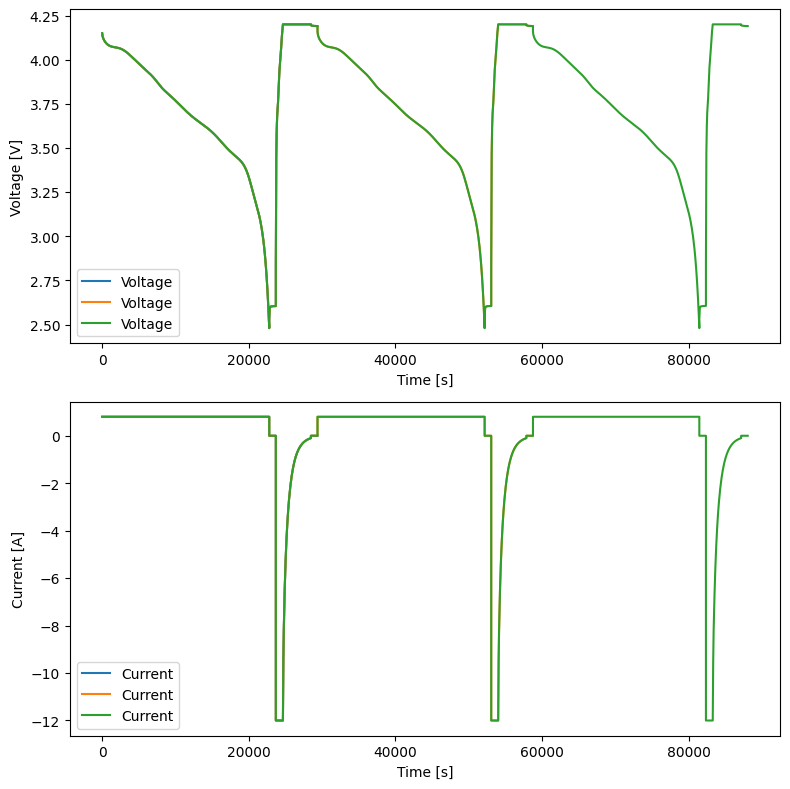

In [6]:
fast()

In [9]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (2) :
        experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        ("discharge at 0.8A until 2.48V",  # discharging by default
         "rest for 15 minute",
         f"charge at 12A until 4.2V",
         "hold at 4.2V until C/50",
         "rest for 15 minute")])
        sim2 = pybamm.Simulation(spm, experiment=experiment2, parameter_values=params)
        sol2 = sim2.solve(starting_solution=solution[i])
        solution.append(sol2)

    # fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    # for sol in solution :
    #   t = sol["Time [s]"].entries
    #   V = sol["Terminal voltage [V]"].entries
    #   I = sol["Current [A]"].entries
    #   ax[0].plot(t, V, label="Voltage")
    #   ax[1].plot(t, I, label="Current")

    # ax[0].set_xlabel("Time [s]")
    # ax[0].set_ylabel("Voltage [V]")
    # ax[1].set_xlabel("Time [s]")
    # ax[1].set_ylabel("Current [A]")
    # ax[0].legend()
    # ax[1].legend()
    # plt.tight_layout()
    # plt.show()

    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    total_time = 0
    for sol in solution:
      t = sol["Time [s]"].entries + total_time
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      total_time += sol["Time [s]"].entries[-1]
      ax[0].plot(t, V, label="Voltage")
      ax[1].plot(t, I, label="Current")

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()


Fast Cycle Launched Successfully !!


2023-05-18 20:17:01.606 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (276.883 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (276.883 us elapsed) --------------------
2023-05-18 20:17:01.617 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
NOTICE:pybamm.logger:Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
2023-05-18 20:17:01.750 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/5: rest for 15 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/5: rest for 15 minute
2023-05-18 20:17:01.797 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/5: charge at 12A until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/5: charge at 12A until 4.2V
2023-05-18 20:17:01.884 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/5: hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/5: hold at 4.2V until C/50
2023-05-18 20:17:01.999 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/5: rest for 15 m

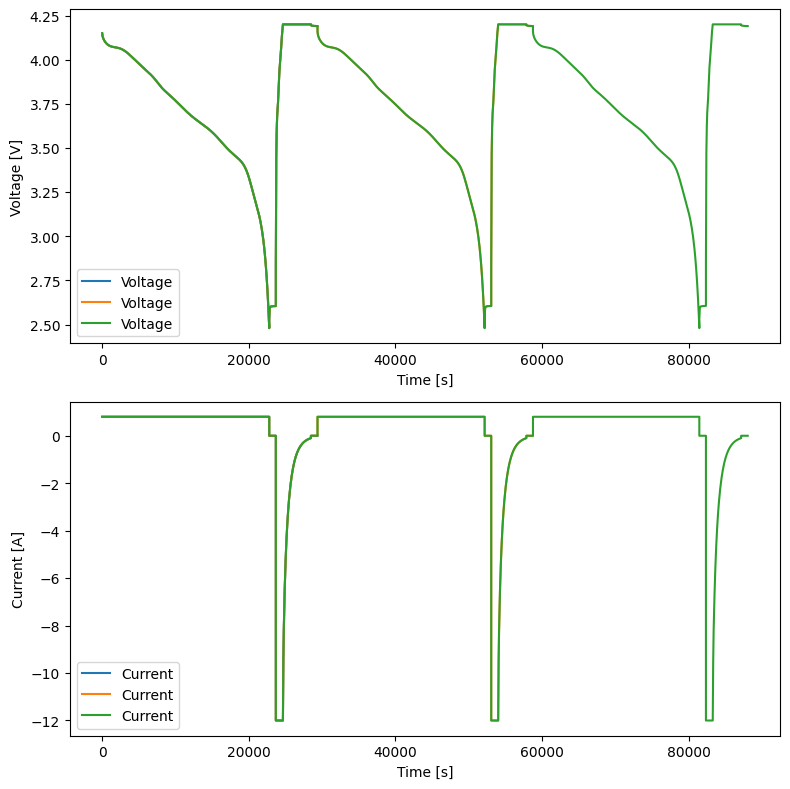

In [10]:
fast()

In [12]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (2) :
        experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        ("discharge at 0.8A until 2.48V",  # discharging by default
         "rest for 15 minute",
         f"charge at 12A until 4.2V",
         "hold at 4.2V until C/50",
         "rest for 15 minute")])
        sim2 = pybamm.Simulation(spm, experiment=experiment2, parameter_values=params)
        sol2 = sim2.solve(starting_solution=solution[i])
        solution.append(sol2)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    for i, sol in enumerate(solution):
      t = sol["Time [s]"].entries
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      color = colors[i % len(colors)]
      ax[0].plot(t, V, color=color)
      ax[1].plot(t, I, color=color)

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    plt.tight_layout()
    plt.show()


Fast Cycle Launched Successfully !!


2023-05-18 10:34:53.200 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (608.586 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (608.586 us elapsed) --------------------
2023-05-18 10:34:53.212 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
NOTICE:pybamm.logger:Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
2023-05-18 10:34:53.432 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/5: rest for 15 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/5: rest for 15 minute
2023-05-18 10:34:53.486 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/5: charge at 12A until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/5: charge at 12A until 4.2V
2023-05-18 10:34:53.567 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/5: hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/5: hold at 4.2V until C/50
2023-05-18 10:34:53.703 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/5: rest for 15 m

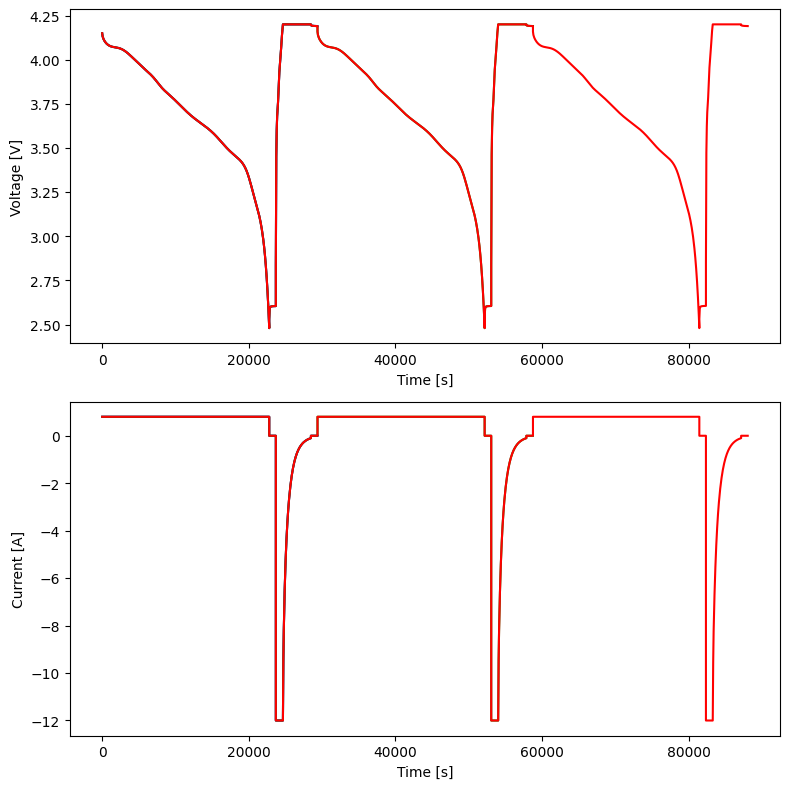

In [13]:
fast()

In [42]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (15) :
        # experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        # ("discharge at 0.8A until 2.48V",  # discharging by default
        #  "rest for 15 minute",
        #  f"charge at 12A until 4.2V",
        #  "hold at 4.2V until C/50",
        #  "rest for 15 minute")])
        # sim2 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
        #!Changed sim to sim1 frm sim2
        sol2 = sim1.solve(starting_solution=solution[i])
        solution.append(sol2)

    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    
    for sol in solution:
      t = sol["Time [s]"].entries
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      ax[0].plot(t[:496], V[len(V) - 496:])
      ax[1].plot(t[:496], I[len(I) - 496:])

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    plt.tight_layout()
    plt.show()


Fast Cycle Launched Successfully !!


2023-05-18 21:12:50.022 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (168.797 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (168.797 us elapsed) --------------------
2023-05-18 21:12:50.028 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
NOTICE:pybamm.logger:Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
2023-05-18 21:12:50.174 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/5: rest for 15 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/5: rest for 15 minute
2023-05-18 21:12:50.218 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/5: charge at 12A until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/5: charge at 12A until 4.2V
2023-05-18 21:12:50.297 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/5: hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/5: hold at 4.2V until C/50
2023-05-18 21:12:50.417 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/5: rest for 15 m

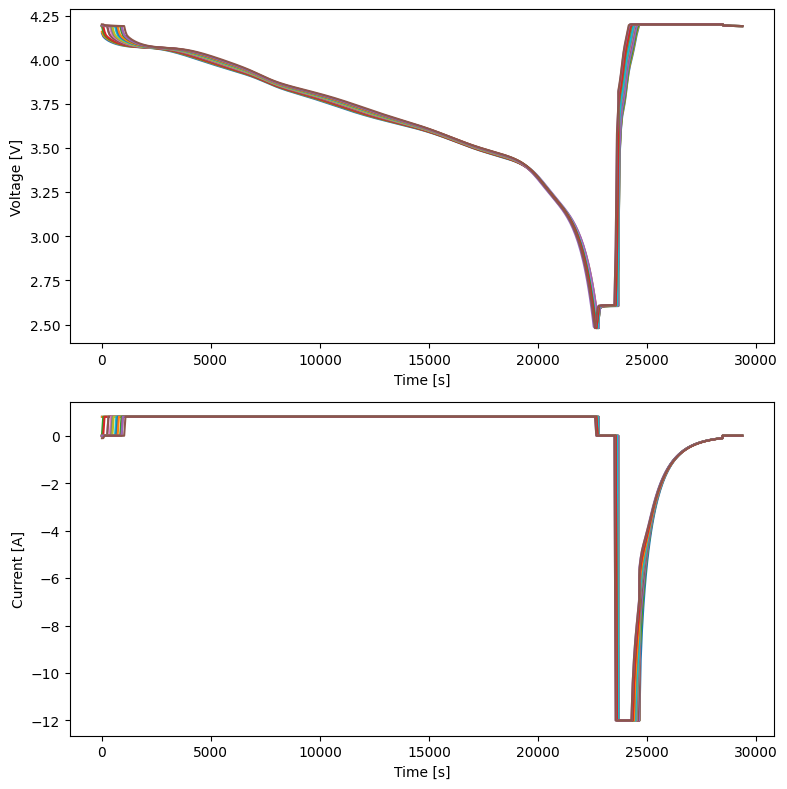

In [43]:
fast()

In [44]:
def fast():  # function to run discharge and charge cycles
    print('Fast Cycle Launched Successfully !!')
    pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
    # solution  = [] # blank array defined for storing solutions after simulation
    params = pybamm.ParameterValues("Chen2020")  # calling parameters of chen from pybamm
    params.update({"SEI kinetic rate constant [m.s-1]": 1e-14,  # updating rate const from -15to-14 for easy calculation
                   "Ambient temperature [K]": 298})
    spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
                                {"SEI": "ec reaction limited",          # capacity fade model
                                 "thermal": "lumped",                   # thermal model
                                 "SEI porosity change": "true",         # porosity change model
                                 "SEI film resistance": "distributed"}  # film resistance model
                                )
    experiment1 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
    ("discharge at 0.8 A until 2.48V",  # discharging by default
     "rest for 15 minute",
     "charge at 12A until 4.2V",
     "hold at 4.2V until C/50",
     "rest for 15 minute")])
    sim1 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
    # giving model, experiment and parameters to simulation
    sol1 = sim1.solve()
    no_entries = len(sol1["Time [s]"].entries)
    # solver=pybamm.CasadiSolver(mode="safe")) #sim1.solve() # solving and writing results to variable sol1
    solution = [sol1]  # writing sol1 to solution array

    for i in range (49) :
        # experiment2 = pybamm.Experiment([  # defining experiment steps for first or initial cycle
        # ("discharge at 0.8A until 2.48V",  # discharging by default
        #  "rest for 15 minute",
        #  f"charge at 12A until 4.2V",
        #  "hold at 4.2V until C/50",
        #  "rest for 15 minute")])
        # sim2 = pybamm.Simulation(spm, experiment=experiment1, parameter_values=params)
        #!Changed sim to sim1 frm sim2
        sol2 = sim1.solve(starting_solution=solution[i])
        solution.append(sol2)

    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    
    for sol in solution:
      t = sol["Time [s]"].entries
      V = sol["Terminal voltage [V]"].entries
      I = sol["Current [A]"].entries
      ax[0].plot(t[:no_entries], V[len(V) - no_entries:])
      ax[1].plot(t[:no_entries], I[len(I) - no_entries:])

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    plt.tight_layout()
    plt.show()


Fast Cycle Launched Successfully !!


2023-05-18 21:18:46.790 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (185.388 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (185.388 us elapsed) --------------------
2023-05-18 21:18:46.797 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
NOTICE:pybamm.logger:Cycle 1/1, step 1/5: discharge at 0.8 A until 2.48V
2023-05-18 21:18:46.935 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/5: rest for 15 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/5: rest for 15 minute
2023-05-18 21:18:46.980 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/5: charge at 12A until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/5: charge at 12A until 4.2V
2023-05-18 21:18:47.060 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/5: hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/5: hold at 4.2V until C/50
2023-05-18 21:18:47.178 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/5: rest for 15 m

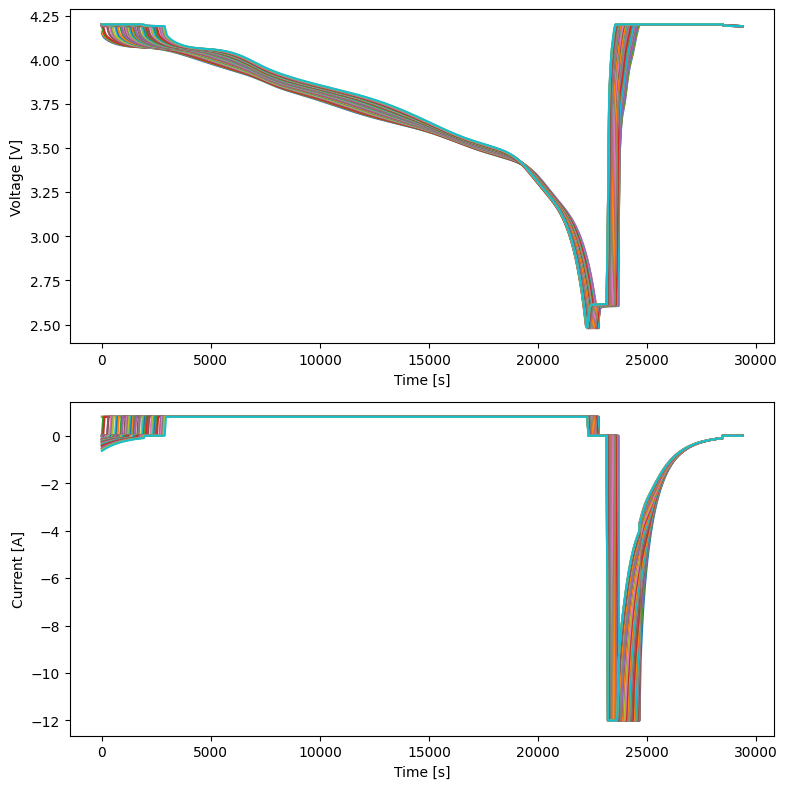

In [45]:
fast()